# Imports

In [5]:
from data.actiondata import ActionData
from match import Match
from encoder import LabelEncoder
from model import ActionModel

import numpy as np

In [6]:
match_1_instance = Match("../data/match_1.json")
match_2_instance = Match("../data/match_2.json")

## Drop `no action` for the second match

In [7]:
match_2_instance.info()

Number of gaits in this match is: 613


In [8]:
# Drop "no action" as it only figures twice in the second match
for index, element in enumerate(match_2_instance.data):
    if element["label"] == "no action":
        match_2_instance.data.pop(index)

In [9]:
match_2_instance.actions

{'cross', 'dribble', 'pass', 'rest', 'run', 'shot', 'tackle', 'walk'}

In [10]:
match_2_instance.info()

Number of gaits in this match is: 611


In [11]:
match_1_sequences = match_1_instance.clean_data()
match_1_data = ActionData(match_1_sequences)

match_2_sequences = match_2_instance.clean_data()
match_2_data = ActionData(match_2_sequences)

In [12]:
all_data_instance = match_1_data + match_2_data

In [13]:
print(all_data_instance.sequences[10])
print(all_data_instance.sequences[700])

['walk', 'walk', 'walk', 'rest', 'walk', 'walk', 'walk', 'run', 'run', 'run', 'walk', 'walk', 'walk', 'rest', 'walk', 'walk', 'walk', 'run', 'run', 'run']
['walk', 'walk', 'walk', 'run', 'run', 'run', 'walk', 'walk', 'walk', 'run', 'run', 'run', 'walk', 'walk', 'walk', 'tackle', 'walk', 'walk', 'walk', 'run']


In [14]:
ACTION_MODEL_DATA_PATH = "../data/model/action_model_data.txt"
all_data_instance.save(ACTION_MODEL_DATA_PATH)

In [17]:
X, y = [], []  # X: data, y: labels or targets
for element in all_data_instance.sequences[1:]:
    X.append(element[:-1])
    y.append(element[-1])

In [18]:
all_data_instance.train_test_split(X, y, train_size=0.7)

In [19]:
all_data_instance.info()

Size of training set: 784 
Size of validation set: 168 
Size of test set: 168


In [24]:
label_encoder = LabelEncoder.load("data/encoder.json")
# label_encoder.fit(X_train) # Use the defined encoder from now on.

In [25]:
label_encoder.class_to_index

{'run': 0,
 'walk': 1,
 'tackle': 2,
 'pass': 3,
 'rest': 4,
 'cross': 5,
 'dribble': 6,
 'shot': 7,
 '<Undefined>': 18}

In [26]:
(
    X_train_transformed,
    y_train_transformed,
    X_val_transformed,
    y_val_transformed,
    X_test_transformed,
    y_test_transformed,
) = all_data_instance.transform(label_encoder)

In [27]:
# Data point that caused an issue
X_train_transformed.pop(70)
y_train_transformed.pop(70)

0

In [28]:
X_train_padded, X_val_padded, X_test_padded = all_data_instance.pad_sequences(
    X_train_transformed, X_val_transformed, X_test_transformed
)

In [29]:
X_train_padded = np.array(X_train_padded)
X_val_padded = np.array(X_val_padded)
X_test_padded = np.array(X_test_padded)
y_train_transformed = np.array(y_train_transformed)
y_val_transformed = np.array(y_val_transformed)
y_test_transformed = np.array(y_test_transformed)

In [32]:
model = ActionModel(encoder=label_encoder)

In [33]:
model.compile()

In [36]:
model.fit(
    X_train=X_train_padded,
    y_train=y_train_transformed,
    X_val=X_val_padded,
    y_val=y_val_transformed,
)

Epoch 1/100
783/783 [==============================] - 9s 7ms/step - loss: 1.6384 - accuracy: 0.4432 - val_loss: 1.2670 - val_accuracy: 0.4286
Epoch 2/100
783/783 [==============================] - 4s 5ms/step - loss: 1.3221 - accuracy: 0.5045 - val_loss: 1.2875 - val_accuracy: 0.6190
Epoch 3/100
783/783 [==============================] - 4s 5ms/step - loss: 1.2411 - accuracy: 0.5364 - val_loss: 1.1086 - val_accuracy: 0.5298
Epoch 4/100
783/783 [==============================] - 5s 6ms/step - loss: 1.2085 - accuracy: 0.5556 - val_loss: 1.1657 - val_accuracy: 0.6131
Epoch 5/100
783/783 [==============================] - 4s 5ms/step - loss: 1.2005 - accuracy: 0.5709 - val_loss: 1.0756 - val_accuracy: 0.6071
Epoch 6/100
783/783 [==============================] - 4s 5ms/step - loss: 1.1867 - accuracy: 0.5632 - val_loss: 1.1465 - val_accuracy: 0.5893
Epoch 7/100
783/783 [==============================] - 5s 6ms/step - loss: 1.1753 - accuracy: 0.5722 - val_loss: 1.0933 - val_accuracy: 0.5417

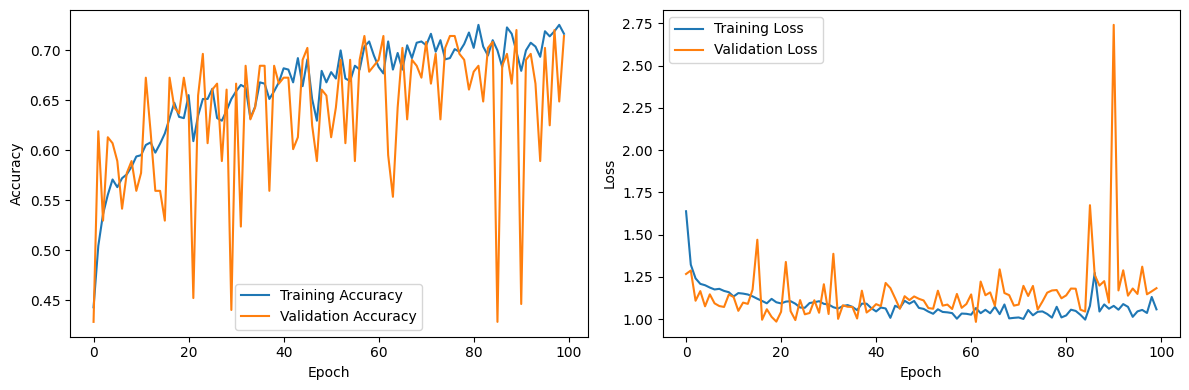

In [37]:
model.plot()

In [46]:
model.evaluate(X_test_padded, y_test_transformed)

6/6 [==============================] - 1s 4ms/step - loss: 1.3838 - accuracy: 0.6726
Test loss: 1.3837746381759644 
Test accuracy: 0.6726190447807312


In [38]:
test_sequence = ["dribble", "pass", "walk", "walk", "shot", "run"]
model.predict_standalone(test_sequence)

1/1 [==============================] - 1s 914ms/step


['walk']

In [45]:
model.save()

In [1]:
from model import ActionModel
from encoder import LabelEncoder

In [2]:
label_encoder = LabelEncoder.load("../data/model/encoder.json")
model = ActionModel.load(label_encoder)

In [3]:
test_sequence = ["dribble", "pass", "walk", "walk", "shot", "run"]
model.predict_standalone(test_sequence)

1/1 [==============================] - 1s 1s/step
[[6.2637222e-03 9.7044599e-01 3.4026667e-03 2.6990965e-04 1.9244937e-02
  5.5397629e-07 3.4063632e-04 2.6413702e-05 5.1931816e-06]]
[1]


['walk']

 # Hyper-parameters Tuning

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]
optimizers = [SGD(learning_rate=lr) for lr in learning_rates]

for optimizer in optimizers:
    for batch_size in batch_sizes:
        # Compile the model with the current hyperparameters
        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

        # Implement early stopping
        early_stopping = EarlyStopping(
            monitor="val_loss", patience=10, restore_best_weights=True
        )

        # Train the model with the current hyperparameters
        history = model.fit(
            X_train_padded,
            y_train_transformed,
            epochs=20,
            batch_size=batch_size,
            validation_data=(X_val_padded, y_val_transformed),
            callbacks=[early_stopping],
        )

        # Print and log the results, and save the best model for each set of hyperparameters

        # Evaluate the best model on your test set to obtain the final performance metrics
        test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_transformed)
        print(f"Using optimizer: {optimizer.learning_rate}, Batch Size: {batch_size}")
        print(f"Test Loss: {test_loss}")
        print(f"Test Accuracy: {test_accuracy}")

## *Outcome*: all possible configurations averaged 47.75 as Test accuracy and 1.414 as Test Loss, trying other hyper-parameters.